# Import

In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [63]:
from datetime import datetime, timedelta, date
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn import preprocessing
import plotly.graph_objects as go
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() 

# pandas max row 
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

Instructions for updating:
non-resource variables are not supported in the long term


In [64]:
#from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense, LSTM
#from keras.preprocessing import sequence
#from keras.utils import np_utils
#from keras.callbacks import EarlyStopping, ModelCheckpoint

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
tf.compat.v1.disable_v2_behavior() 

정상 불량 balanced

# Data Load

In [66]:
df = pd.read_csv('../Data/df_preprocessing.csv', encoding='cp949')

In [67]:
df.head(3)

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,Measurement_error,MW_Period_Second,TAG
0,2020-03-04 00:00:00,0,48.9,11.6,631.0,3.19,0,912,0
1,2020-03-04 00:00:06,1,43.3,7.8,609.0,3.19,0,912,0
2,2020-03-04 00:00:12,2,46.4,15.4,608.0,3.19,0,912,0


In [68]:
df = df.set_index(['STD_DT'])

In [69]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')

In [70]:
df.head(3)

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,Measurement_error,MW_Period_Second,TAG
STD_DT,,,,,,,,
2020-03-04 00:00:00,0,48.9,11.6,631.0,3.19,0,912,0
2020-03-04 00:00:06,1,43.3,7.8,609.0,3.19,0,912,0
2020-03-04 00:00:12,2,46.4,15.4,608.0,3.19,0,912,0


In [71]:
df.shape[0] * 0.7

584640.0

In [72]:
df.index[584640]

Timestamp('2020-04-13 14:24:00')

In [73]:
df['2020-04-13'].tail(3)

C:\Users\pc\AppData\Local\Temp\ipykernel_27604\524142599.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-04-13'].tail(3)


,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,Measurement_error,MW_Period_Second,TAG
STD_DT,,,,,,,,
2020-04-13 23:59:42,590397,49.1,16.0,208.0,3.19,0,3156,0
2020-04-13 23:59:48,590398,48.3,9.0,205.0,3.19,0,3156,0
2020-04-13 23:59:54,590399,48.4,12.2,203.0,3.19,0,3156,0


In [74]:
df[:'2020-04-13 23:59:54'].shape

(590400, 8)

In [80]:
df_train = df_train.drop(columns = ['NUM'])
df_test = df_test.drop(columns = ['NUM'])

In [81]:
train = df_train.copy()
test = df_test.copy()

In [82]:
print(train.shape)
print(test.shape)

(403200, 7)
(432000, 7)


In [83]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'Measurement_error', 'MW_Period_Second']
label_cols = ['TAG']

In [84]:
X_train = train[feature_cols]
y_train = train[label_cols]

In [85]:
X_train.head(3)

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,Measurement_error,MW_Period_Second
STD_DT,,,,,,
2020-03-04 00:00:00,48.9,11.6,631.0,3.19,0,912
2020-03-04 00:00:06,43.3,7.8,609.0,3.19,0,912
2020-03-04 00:00:12,46.4,15.4,608.0,3.19,0,912


In [86]:
y_train.head(3) # 1이 불량, 0이 정상

,TAG
STD_DT,
2020-03-04 00:00:00,0
2020-03-04 00:00:06,0
2020-03-04 00:00:12,0


In [88]:
window_size = 20

In [89]:
def make_dataset_X(data, window_size):
  feature_list = []
  for i in range(0, len(data) - window_size, 10):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
  return np.array(feature_list)

In [90]:
train_feature = make_dataset_X(X_train,window_size)

In [91]:
X_train.head(11)

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,Measurement_error,MW_Period_Second
STD_DT,,,,,,
2020-03-04 00:00:00,48.9,11.6,631.0,3.19,0,912
2020-03-04 00:00:06,43.3,7.8,609.0,3.19,0,912
2020-03-04 00:00:12,46.4,15.4,608.0,3.19,0,912
2020-03-04 00:00:18,37.9,21.2,606.0,3.19,0,912
2020-03-04 00:00:24,79.8,173.6,604.0,3.21,0,912
2020-03-04 00:00:30,74.3,172.2,603.0,3.21,0,912
2020-03-04 00:00:36,39.0,21.2,602.0,3.19,0,912
2020-03-04 00:00:42,49.3,15.2,600.0,3.19,0,912
2020-03-04 00:00:48,42.7,0.0,599.0,3.19,0,912


In [93]:
y_train.head(20)

,TAG
STD_DT,
2020-03-04 00:00:00,0
2020-03-04 00:00:06,0
2020-03-04 00:00:12,0
2020-03-04 00:00:18,0
2020-03-04 00:00:24,0
2020-03-04 00:00:30,0
2020-03-04 00:00:36,0
2020-03-04 00:00:42,0
2020-03-04 00:00:48,0


In [94]:
train_feature.shape

(40318, 20, 6)

In [95]:
y_train.index = train.index
y_train['DT_min'] = y_train.apply(lambda x : x.name.strftime("%Y-%m-%d %H:%M") , axis = 1)
y_train_min = pd.pivot_table(y_train, index = ['DT_min'], values = ['TAG'], aggfunc = 'max') # 1분간 1번이라도 불량이 발생하면 0(불량)으로 처리
train_label = y_train_min.TAG.values[window_size//10:] # y값은 과거의 데이터를 보고 예측하는거기 때문에 1 step 넘기기

C:\Users\pc\AppData\Local\Temp\ipykernel_27604\4267234388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['DT_min'] = y_train.apply(lambda x : x.name.strftime("%Y-%m-%d %H:%M") , axis = 1)


In [96]:
y_train_min

,TAG
DT_min,
2020-03-04 00:00,0
2020-03-04 00:01,0
2020-03-04 00:02,0
2020-03-04 00:03,0
2020-03-04 00:04,0
...,...
2020-03-31 23:55,1
2020-03-31 23:56,1
2020-03-31 23:57,1


In [97]:
X_train.shape, y_train.shape

((403200, 6), (403200, 2))

In [98]:
train_feature.shape, train_label.shape

((40318, 20, 6), (40318,))

In [99]:
train_label

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [100]:
test_feature = test[feature_cols]
test_label = test[label_cols]

# test_feature
test_feature = make_dataset_X(test_feature, window_size)

In [103]:
# test label
test_label.index = test.index
test_label['DT_min'] = test_label.apply(lambda x : x.name.strftime("%Y-%m-%d %H:%M") , axis = 1)
test_label_min = pd.pivot_table(test_label, index = ['DT_min'], values = ['TAG'], aggfunc = 'max') # 1분간 1번이라도 불량이 발생하면 0(불량)으로 처리
test_label = test_label_min.TAG.values[window_size//10:] # y값은 과거의 데이터를 보고 예측하는거기 때문에 1 step 넘기기

C:\Users\pc\AppData\Local\Temp\ipykernel_27604\3669689304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_label['DT_min'] = test_label.apply(lambda x : x.name.strftime("%Y-%m-%d %H:%M") , axis = 1)


In [104]:
test_feature.shape, test_label.shape

((43198, 20, 6), (43198,))

In [105]:
# # train, validation set 생성
X_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3) X_train.shape, x_valid.shape

# LSTM

In [110]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, 
              input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation = 'tanh',return_sequences=False)
          )
model.add(Dense(1, activation='sigmoid'))

In [111]:
model_path = '../Model'

In [112]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [113]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['acc',f1_m,precision_m, recall_m])
early_stop = EarlyStopping(monitor='val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=0,
                             save_best_only=True, mode='auto')

In [114]:
# model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# early_stop = EarlyStopping(monitor='val_loss', patience = 5)
# filename = os.path.join(model_path, 'tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=0,
#                              save_best_only=True, mode='auto')

In [115]:
test_feature.shape, test_label.shape

((43198, 20, 6), (43198,))

In [116]:
history = model.fit(train_feature, train_label,
                   epochs = 200,
                   batch_size = 10,
                   validation_data = (test_feature, test_label)
                   , callbacks=[early_stop, checkpoint])

Train on 40318 samples, validate on 43198 samples
Epoch 1/200
40310/40318 [============================>.] - ETA: 0s - loss: 0.6799 - acc: 0.5625 - f1_m: 0.5863 - precision_m: 0.5846 - recall_m: 0.6622

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


40318/40318 [==============================] - 110s 3ms/sample - loss: 0.6799 - acc: 0.5625 - f1_m: 0.5864 - precision_m: 0.5846 - recall_m: 0.6623 - val_loss: 0.7413 - val_acc: 0.4320 - val_f1_m: 0.4602 - val_precision_m: 0.4080 - val_recall_m: 0.5911
Epoch 2/200
40318/40318 [==============================] - 103s 3ms/sample - loss: 0.6743 - acc: 0.5781 - f1_m: 0.5836 - precision_m: 0.6027 - recall_m: 0.6217 - val_loss: 0.7344 - val_acc: 0.4223 - val_f1_m: 0.2946 - val_precision_m: 0.3397 - val_recall_m: 0.3021
Epoch 3/200
40318/40318 [==============================] - 105s 3ms/sample - loss: 0.6753 - acc: 0.5683 - f1_m: 0.5417 - precision_m: 0.6128 - recall_m: 0.5634 - val_loss: 0.7571 - val_acc: 0.4512 - val_f1_m: 0.5979 - val_precision_m: 0.4491 - val_recall_m: 0.9744
Epoch 4/200
40318/40318 [==============================] - 102s 3ms/sample - loss: 0.6740 - acc: 0.5788 - f1_m: 0.5447 - precision_m: 0.6166 - recall_m: 0.5477 - val_loss: 0.7645 - val_acc: 0.4229 - val_f1_m: 0.3935 -

In [117]:
model.load_weights(filename)
pred = model.predict(test_feature)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


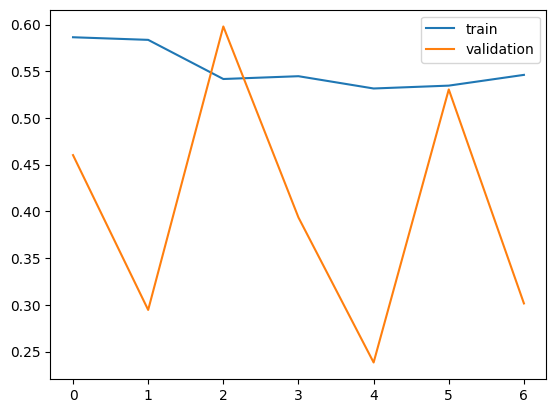

In [118]:
plt.plot(history.history['f1_m'], label='train')
plt.plot(history.history['val_f1_m'], label='validation')
plt.legend()
plt.show()

In [119]:
pred_df = pd.DataFrame(pred, columns= ['TAG'])

In [120]:
pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x> 0.5 else 0)

In [121]:
pred_df['TAG'].value_counts()

0    25834
1    17364
Name: TAG, dtype: int64

In [122]:
pd.Series(test_label).value_counts()

0    23794
1    19404
dtype: int64

In [123]:
classify = confusion_matrix(test_label, pred_df)
print(classify)

[[12335 11459]
 [13499  5905]]


In [124]:
from sklearn.metrics import classification_report
print(classification_report(test_label, pred_df))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50     23794
           1       0.34      0.30      0.32     19404

    accuracy                           0.42     43198
   macro avg       0.41      0.41      0.41     43198
weighted avg       0.42      0.42      0.42     43198



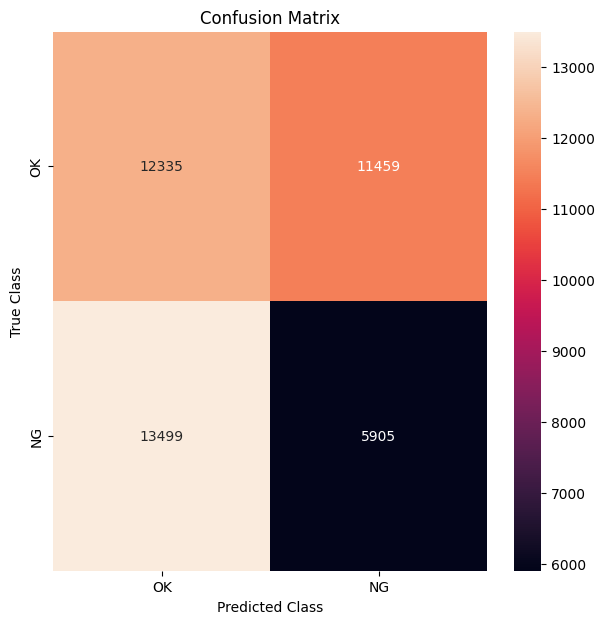

In [125]:
plt.figure(figsize=(7, 7))
sns.heatmap(classify, xticklabels=['OK', 'NG'], yticklabels=['OK', 'NG'], annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

In [126]:
p = precision_score(test_label, pred_df)
print("precision : %0.4f" %p)
r = recall_score(test_label, pred_df)
print("recall : %0.4f" %r)
f1 = f1_score(test_label, pred_df)
print("f1-score : %0.4f" %f1)
acc = accuracy_score(test_label, pred_df)
print("accuracy : %0.4f" %acc)

precision : 0.3401
recall : 0.3043
f1-score : 0.3212
accuracy : 0.4222


In [127]:
df_result = pred_df.copy()
df_result.rename(columns = {'TAG' : 'pred'}, inplace = True)